### Algorithm/Model Used - Linear Regression Model.

### Problem Statement

### Importing Liabraries

In [1]:
#importing liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import os
import math
import matplotlib.pyplot as plt

#Importing algorithms and data split features
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#importing evaluation metrics for the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Data Gathering

In [2]:
df = pd.read_excel('auto_data_sorted.xlsx')
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0          4         140.0        86.0    2790          15.6   
402  44.0          4          97.0        52.0    2130          24.6   
403  32.0          4         135.0        84.0    2295          11.6   
404  28.0          4         120.0        79.0    2625          18.6   
405  31.0          4         119.0        82.0    2720          19.4   

     Model_Year  origin                    model_name  
0            70       1  chevrolet chevelle malibu"""  
1            70       1          buick skylark 320"""  
2            70       1         plymouth satellite"""  
3            70       1              amc rebel sst"""  
4            70       1                ford torino"""  
..          ...     ...                           ...  
401          82       1            ford mustang gl"""  
402          82       2                  vw pickup"""  
403          82       1              dodge rampage"""  
404          82       1                ford ranger"""  
405          82       1                 chevy s-10"""  

[406 rows x 9 columns]

### Data Analysis

In [3]:
df.shape

(406, 9)

In [4]:
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.815984    1.712160    104.922458   38.768779   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   75.750000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  130.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  Model_Year      origin  
count    406.000000  406.000000  406.000000  
mean      15.519704   75.921182    1.568966  
std        2.803359    3.748737    0.797479  
min        8.000000   70.000000    1.000000  
25%       13.700000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

### Data Processing

In [5]:
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
Model_Year      0
origin          0
model_name      0
dtype: int64

In [6]:
df.mpg.isnull().sum()

8

In [7]:
df.horsepower.isnull().sum()

6

In [8]:
df["mpg"].unique()

array([18. , 15. , 16. , 17. , 14. ,  nan, 24. , 22. , 21. , 27. , 26. ,
       25. , 10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. ,
       35. , 20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5,
       29.5, 26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1,
       36.1, 32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6,
       18.1, 17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6,
       16.2, 19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4,
       34.2, 34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2,
       26.4, 24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8,
       44.3, 43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6,
       25.8, 23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7,
       32.9, 31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

In [9]:
df["horsepower"].unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 115., 153.,
       175., 170., 160.,  95.,  97.,  85.,  88.,  46.,  87.,  90., 113.,
       200., 210., 193.,  nan,  48., 100., 105., 180., 110.,  72.,  86.,
        70.,  76.,  65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92.,
       145., 137., 158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,
        67.,  83.,  78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98.,
        53.,  81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,
        63.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [10]:
df.fillna(df.mean(),inplace=True)

C:\Users\YOGESH\AppData\Local\Temp\ipykernel_5308\2085774198.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


In [11]:
df["mpg"].unique()

array([18.        , 15.        , 16.        , 17.        , 14.        ,
       23.51457286, 24.        , 22.        , 21.        , 27.        ,
       26.        , 25.        , 10.        , 11.        ,  9.        ,
       28.        , 19.        , 12.        , 13.        , 23.        ,
       30.        , 31.        , 35.        , 20.        , 29.        ,
       32.        , 33.        , 17.5       , 15.5       , 14.5       ,
       22.5       , 24.5       , 18.5       , 29.5       , 26.5       ,
       16.5       , 31.5       , 36.        , 25.5       , 33.5       ,
       20.5       , 30.5       , 21.5       , 43.1       , 36.1       ,
       32.8       , 39.4       , 19.9       , 19.4       , 20.2       ,
       19.2       , 25.1       , 20.6       , 20.8       , 18.6       ,
       18.1       , 17.7       , 27.5       , 27.2       , 30.9       ,
       21.1       , 23.2       , 23.8       , 23.9       , 20.3       ,
       21.6       , 16.2       , 19.8       , 22.3       , 17.6 

In [12]:
df["horsepower"].unique()

array([130.    , 165.    , 150.    , 140.    , 198.    , 220.    ,
       215.    , 225.    , 190.    , 115.    , 153.    , 175.    ,
       170.    , 160.    ,  95.    ,  97.    ,  85.    ,  88.    ,
        46.    ,  87.    ,  90.    , 113.    , 200.    , 210.    ,
       193.    , 105.0825,  48.    , 100.    , 105.    , 180.    ,
       110.    ,  72.    ,  86.    ,  70.    ,  76.    ,  65.    ,
        69.    ,  60.    ,  80.    ,  54.    , 208.    , 155.    ,
       112.    ,  92.    , 145.    , 137.    , 158.    , 167.    ,
        94.    , 107.    , 230.    ,  49.    ,  75.    ,  91.    ,
       122.    ,  67.    ,  83.    ,  78.    ,  52.    ,  61.    ,
        93.    , 148.    , 129.    ,  96.    ,  71.    ,  98.    ,
        53.    ,  81.    ,  79.    , 120.    , 152.    , 102.    ,
       108.    ,  68.    ,  58.    , 149.    ,  89.    ,  63.    ,
        66.    , 139.    , 103.    , 125.    , 133.    , 138.    ,
       135.    , 142.    ,  77.    ,  62.    , 132.    ,  84. 

In [13]:
df.axes

[RangeIndex(start=0, stop=406, step=1),
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
        'acceleration', 'Model_Year', 'origin', 'model_name'],
       dtype='object')]

In [14]:
df.model_name

0      chevrolet chevelle malibu"""
1              buick skylark 320"""
2             plymouth satellite"""
3                  amc rebel sst"""
4                    ford torino"""
                   ...             
401              ford mustang gl"""
402                    vw pickup"""
403                dodge rampage"""
404                  ford ranger"""
405                   chevy s-10"""
Name: model_name, Length: 406, dtype: object

In [15]:
df.corr(method='pearson').head(1)

mpg  cylinders  displacement  horsepower    weight  acceleration  \
mpg  1.0  -0.762698     -0.791268   -0.758059 -0.823327      0.409338   

     Model_Year    origin  
mpg    0.565698  0.561059

<AxesSubplot:>

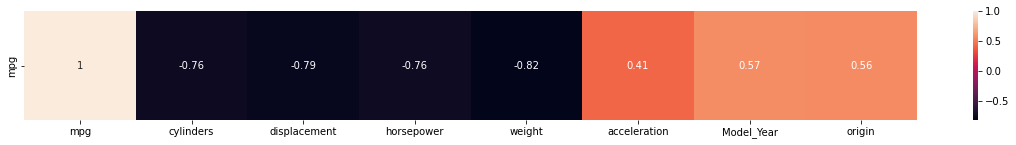

In [16]:
corr =df.corr(method='pearson').head(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

In [17]:
df.corr(method='spearman').head(1)

mpg  cylinders  displacement  horsepower    weight  acceleration  \
mpg  1.0  -0.809793     -0.843345   -0.826474 -0.865592      0.426382   

     Model_Year    origin  
mpg    0.555441  0.577788

<AxesSubplot:>

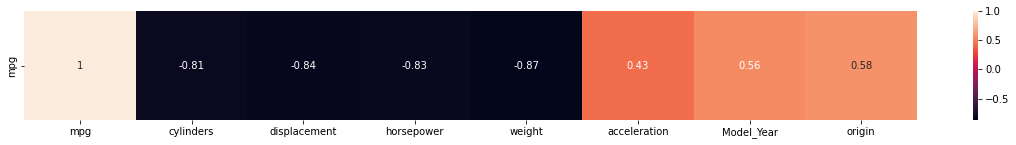

In [18]:
corr =df.corr(method='spearman').head(1)
plt.figure(figsize=(20,2))
sns.heatmap(corr, annot=True)

In [19]:
df.origin.unique()

array([1, 2, 3], dtype=int64)

In [20]:
df.Model_Year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [21]:
df.drop(['model_name'], axis=1, inplace=True)
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0          4         140.0        86.0    2790          15.6   
402  44.0          4          97.0        52.0    2130          24.6   
403  32.0          4         135.0        84.0    2295          11.6   
404  28.0          4         120.0        79.0    2625          18.6   
405  31.0          4         119.0        82.0    2720          19.4   

     Model_Year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70       1  
..          ...     ...  
401          82       1  
402          82       2  
403          82       1  
404          82       1  
405          82       1  

[406 rows x 8 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           406 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    406 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   Model_Year    406 non-null    int64  
 7   origin        406 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.5 KB


In [23]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.762698     -0.791268   -0.758059 -0.823327   
cylinders    -0.762698   1.000000      0.951787    0.840140  0.895220   
displacement -0.791268   0.951787      1.000000    0.894719  0.932475   
horsepower   -0.758059   0.840140      0.894719    1.000000  0.862617   
weight       -0.823327   0.895220      0.932475    0.862617  1.000000   
acceleration  0.409338  -0.522452     -0.557984   -0.692274 -0.430086   
Model_Year    0.565698  -0.360762     -0.381714   -0.419758 -0.315389   
origin        0.561059  -0.567478     -0.613056   -0.458538 -0.584109   

              acceleration  Model_Year    origin  
mpg               0.409338    0.565698  0.561059  
cylinders        -0.522452   -0.360762 -0.567478  
displacement     -0.557984   -0.381714 -0.613056  
horsepower       -0.692274   -0.419758 -0.458538  
weight           -0.430086   -0.315389 -0.584109  
acceleration      1.000000    0.301992  0.218845  
Model_Year        0.301992    1.000000  0.187656  
origin            0.218845    0.187656  1.000000

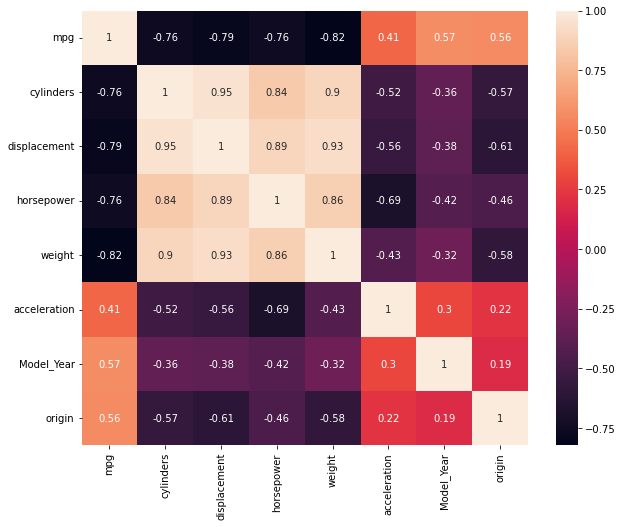

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.savefig("CAR_DATA.png")

In [25]:
df.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  406.000000  406.000000    406.000000  406.000000   406.000000   
mean    23.514573    5.475369    194.779557  105.082500  2979.413793   
std      7.738404    1.712160    104.922458   38.480531   847.004328   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    105.000000   76.000000  2226.500000   
50%     23.000000    4.000000    151.000000   95.000000  2822.500000   
75%     29.000000    8.000000    302.000000  129.000000  3618.250000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  Model_Year      origin  
count    406.000000  406.000000  406.000000  
mean      15.519704   75.921182    1.568966  
std        2.803359    3.748737    0.797479  
min        8.000000   70.000000    1.000000  
25%       13.700000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

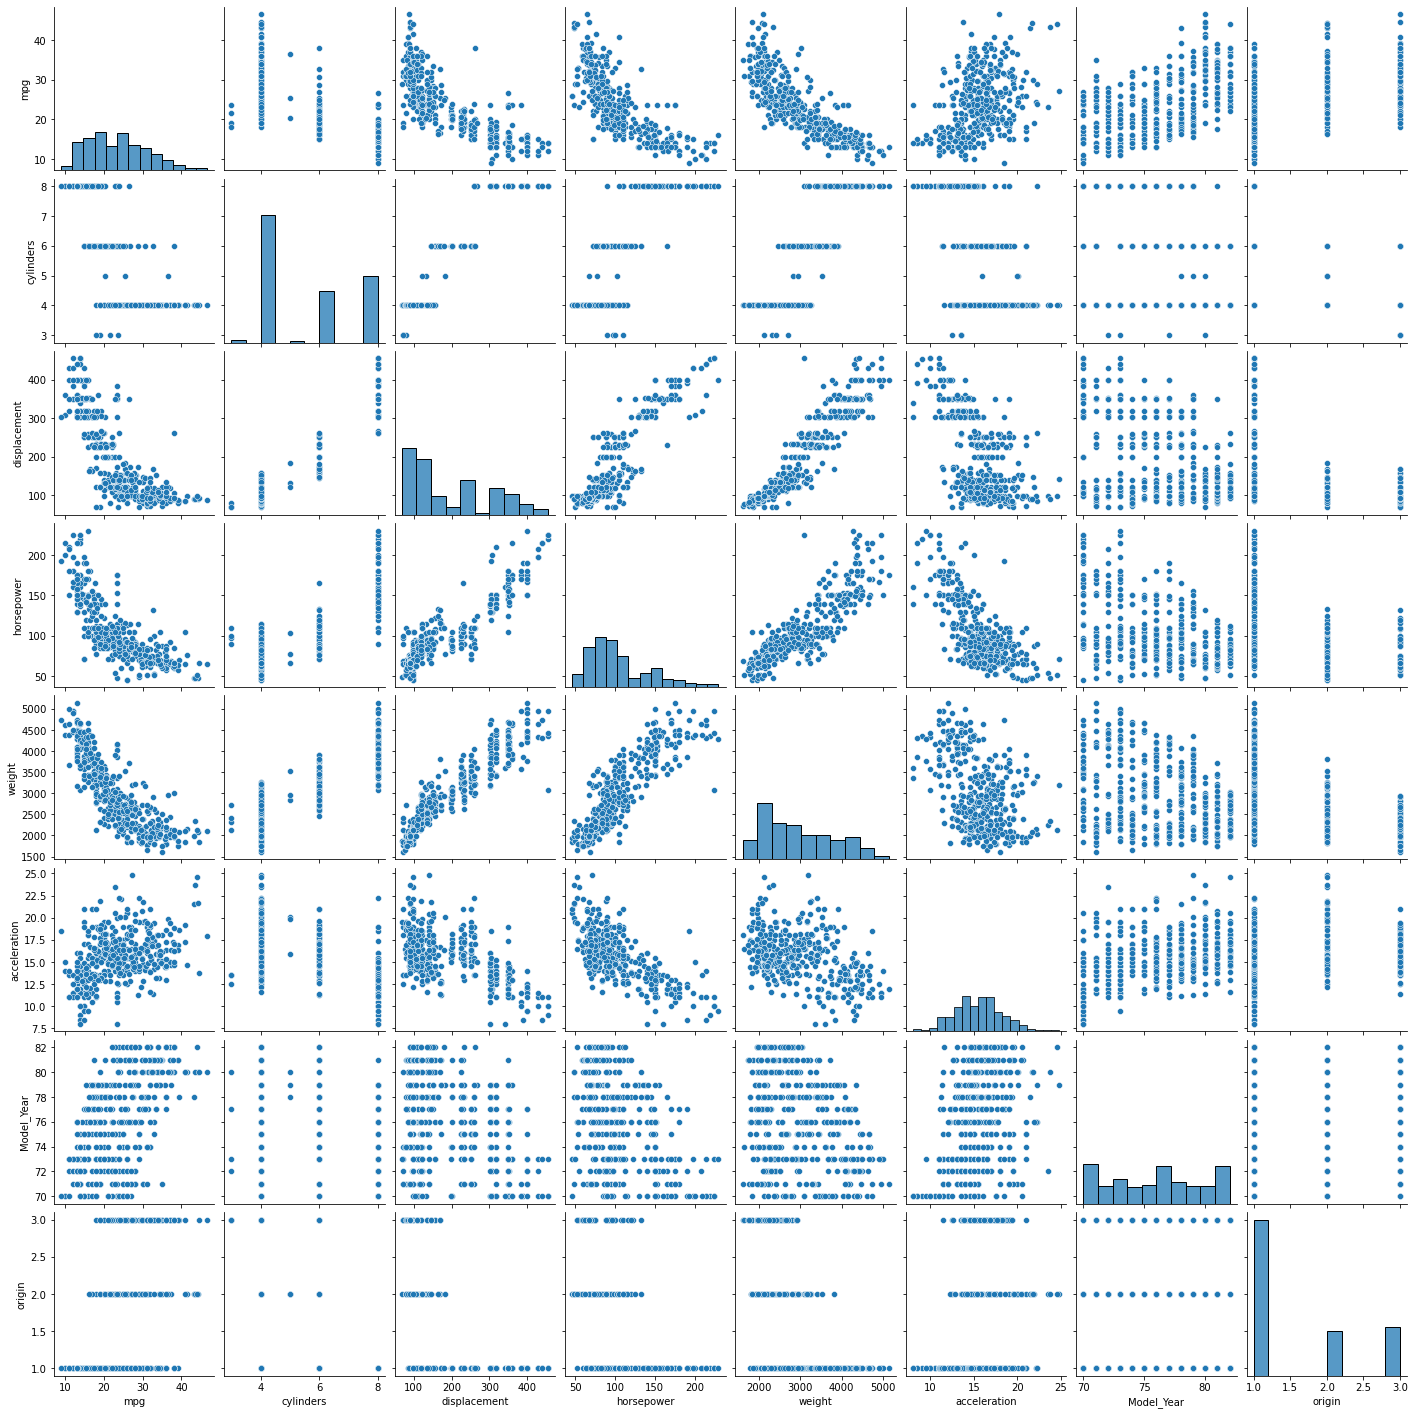

In [26]:
sns.pairplot(df)

<AxesSubplot:xlabel='mpg'>

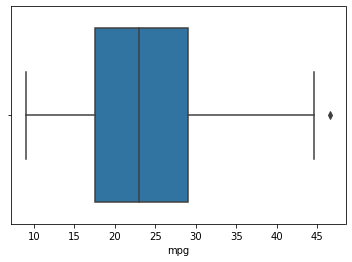

In [27]:
sns.boxplot(x='mpg',data=df) 

<AxesSubplot:xlabel='cylinders'>

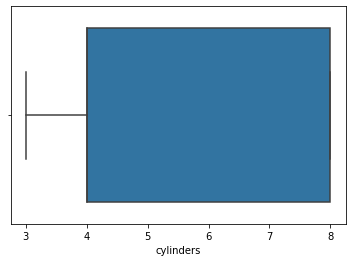

In [28]:
sns.boxplot(x='cylinders',data=df)

<AxesSubplot:xlabel='displacement'>

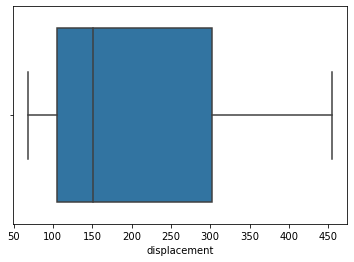

In [29]:
sns.boxplot(x='displacement',data=df)

<AxesSubplot:xlabel='horsepower'>

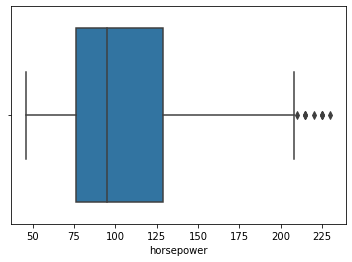

In [30]:
sns.boxplot(x='horsepower',data=df)

<AxesSubplot:xlabel='weight'>

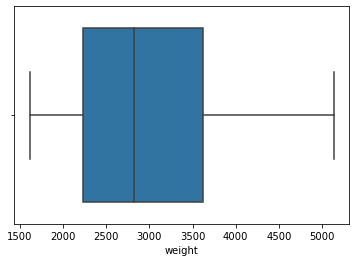

In [31]:
sns.boxplot(x='weight',data=df)

<AxesSubplot:xlabel='acceleration'>

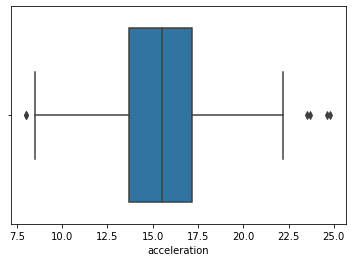

In [32]:
sns.boxplot(x='acceleration',data=df)

<AxesSubplot:xlabel='Model_Year'>

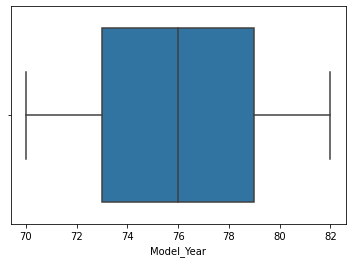

In [33]:
sns.boxplot(x='Model_Year',data=df)

<AxesSubplot:>

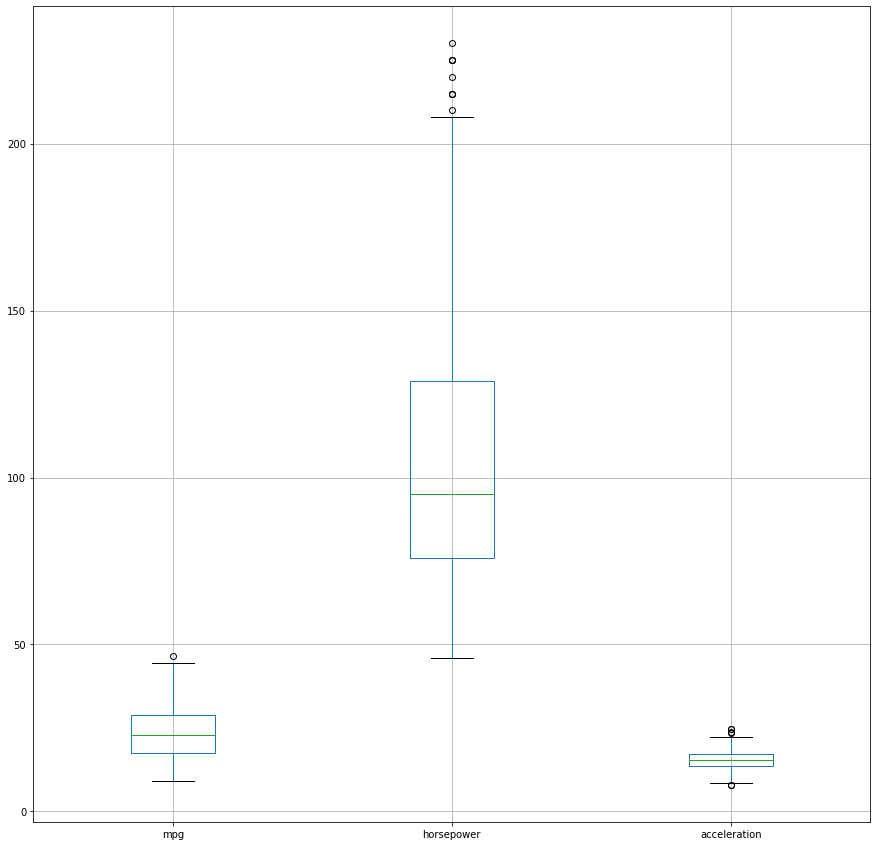

In [34]:
plt.figure(figsize=(15,15))
df.boxplot(column=["mpg","horsepower","acceleration"])

In [35]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0          4         140.0        86.0    2790          15.6   
402  44.0          4          97.0        52.0    2130          24.6   
403  32.0          4         135.0        84.0    2295          11.6   
404  28.0          4         120.0        79.0    2625          18.6   
405  31.0          4         119.0        82.0    2720          19.4   

     Model_Year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70       1  
..          ...     ...  
401          82       1  
402          82       2  
403          82       1  
404          82       1  
405          82       1  

[406 rows x 8 columns]

# Checking outliers in Horsepower column

In [36]:
from statistics import median, quantiles

In [37]:
df["horsepower"]

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
401     86.0
402     52.0
403     84.0
404     79.0
405     82.0
Name: horsepower, Length: 406, dtype: float64

In [38]:
len(np.sort(df["horsepower"]))

406

In [39]:
np.median(df["horsepower"])

95.0

In [40]:
np.sort(df["horsepower"])

array([ 46.    ,  46.    ,  48.    ,  48.    ,  48.    ,  48.    ,
        49.    ,  52.    ,  52.    ,  52.    ,  52.    ,  53.    ,
        53.    ,  54.    ,  58.    ,  58.    ,  60.    ,  60.    ,
        60.    ,  60.    ,  60.    ,  61.    ,  62.    ,  62.    ,
        63.    ,  63.    ,  63.    ,  64.    ,  65.    ,  65.    ,
        65.    ,  65.    ,  65.    ,  65.    ,  65.    ,  65.    ,
        65.    ,  65.    ,  66.    ,  67.    ,  67.    ,  67.    ,
        67.    ,  67.    ,  67.    ,  67.    ,  67.    ,  67.    ,
        67.    ,  67.    ,  67.    ,  68.    ,  68.    ,  68.    ,
        68.    ,  68.    ,  68.    ,  69.    ,  69.    ,  69.    ,
        70.    ,  70.    ,  70.    ,  70.    ,  70.    ,  70.    ,
        70.    ,  70.    ,  70.    ,  70.    ,  70.    ,  70.    ,
        71.    ,  71.    ,  71.    ,  71.    ,  71.    ,  72.    ,
        72.    ,  72.    ,  72.    ,  72.    ,  72.    ,  74.    ,
        74.    ,  74.    ,  75.    ,  75.    ,  75.    ,  75. 

In [41]:
df["horsepower"]

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
401     86.0
402     52.0
403     84.0
404     79.0
405     82.0
Name: horsepower, Length: 406, dtype: float64

In [42]:
Q1 = np.quantile(df["horsepower"],0.25)
Q3 = np.quantile(df["horsepower"],0.75)
print(Q1,Q3)
IQR = Q3-Q1
print('IQR is ',IQR)
upper_bound = Q3+IQR*1.5
lower_bound = Q1-IQR*1.5
print('Upper bound & lower bound is ',upper_bound,lower_bound)



76.0 129.0
IQR is  53.0
Upper bound & lower bound is  208.5 -3.5


In [43]:
detected_outliers= [i for i in df["horsepower"] if i<lower_bound or i>upper_bound]
detected_outliers

[220.0, 215.0, 225.0, 225.0, 215.0, 210.0, 215.0, 225.0, 230.0]

In [44]:
df["horsepower"] = df["horsepower"].mask(df["horsepower"] >upper_bound, upper_bound)

In [45]:
df["horsepower"]

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
401     86.0
402     52.0
403     84.0
404     79.0
405     82.0
Name: horsepower, Length: 406, dtype: float64

# Checking outliers in Horsepower column

In [46]:
df["acceleration"]

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
       ... 
401    15.6
402    24.6
403    11.6
404    18.6
405    19.4
Name: acceleration, Length: 406, dtype: float64

In [47]:
len(np.sort(df["acceleration"]))

406

In [48]:
np.median(df["acceleration"])

15.5

In [49]:
np.sort(df["acceleration"])

array([ 8. ,  8. ,  8.5,  8.5,  9. ,  9.5,  9.5, 10. , 10. , 10. , 10. ,
       10.5, 10.5, 11. , 11. , 11. , 11. , 11. , 11. , 11. , 11. , 11. ,
       11.1, 11.2, 11.3, 11.4, 11.4, 11.5, 11.5, 11.5, 11.5, 11.5, 11.5,
       11.5, 11.5, 11.6, 12. , 12. , 12. , 12. , 12. , 12. , 12. , 12. ,
       12. , 12. , 12.1, 12.2, 12.2, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       12.5, 12.5, 12.6, 12.6, 12.8, 12.8, 12.8, 12.9, 12.9, 13. , 13. ,
       13. , 13. , 13. , 13. , 13. , 13. , 13. , 13. , 13. , 13. , 13.2,
       13.2, 13.2, 13.2, 13.2, 13.2, 13.4, 13.4, 13.5, 13.5, 13.5, 13.5,
       13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5, 13.5,
       13.6, 13.6, 13.7, 13.7, 13.8, 13.8, 13.9, 13.9, 14. , 14. , 14. ,
       14. , 14. , 14. , 14. , 14. , 14. , 14. , 14. , 14. , 14. , 14. ,
       14. , 14. , 14.1, 14.2, 14.2, 14.2, 14.3, 14.3, 14.4, 14.4, 14.4,
       14.4, 14.4, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5,
       14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14.5, 14

In [50]:
df["acceleration"]

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
       ... 
401    15.6
402    24.6
403    11.6
404    18.6
405    19.4
Name: acceleration, Length: 406, dtype: float64

In [51]:
Q1 = np.quantile(df["acceleration"],0.25)
Q3 = np.quantile(df["acceleration"],0.75)
print(Q1,Q3)
IQR = Q3-Q1
print('IQR is ',IQR)
upper_bound = Q3+IQR*1.5
lower_bound = Q1-IQR*1.5
print('Upper bound & lower bound is ',upper_bound,lower_bound)



13.7 17.175
IQR is  3.4750000000000014
Upper bound & lower bound is  22.387500000000003 8.487499999999997


In [52]:
detected_outliers2= [i for i in df["acceleration"] if i<lower_bound or i>upper_bound]
detected_outliers2

[8.0, 8.0, 23.5, 24.8, 23.7, 24.6]

In [53]:
df["acceleration"] = df["acceleration"].mask(df["acceleration"] >upper_bound, upper_bound)

In [54]:
df["acceleration"]

0      12.0000
1      11.5000
2      11.0000
3      12.0000
4      10.5000
        ...   
401    15.6000
402    22.3875
403    11.6000
404    18.6000
405    19.4000
Name: acceleration, Length: 406, dtype: float64

In [55]:
df["acceleration"] = df["acceleration"].mask(df["acceleration"] <lower_bound, lower_bound)

In [56]:
df["acceleration"]

0      12.0000
1      11.5000
2      11.0000
3      12.0000
4      10.5000
        ...   
401    15.6000
402    22.3875
403    11.6000
404    18.6000
405    19.4000
Name: acceleration, Length: 406, dtype: float64

<AxesSubplot:>

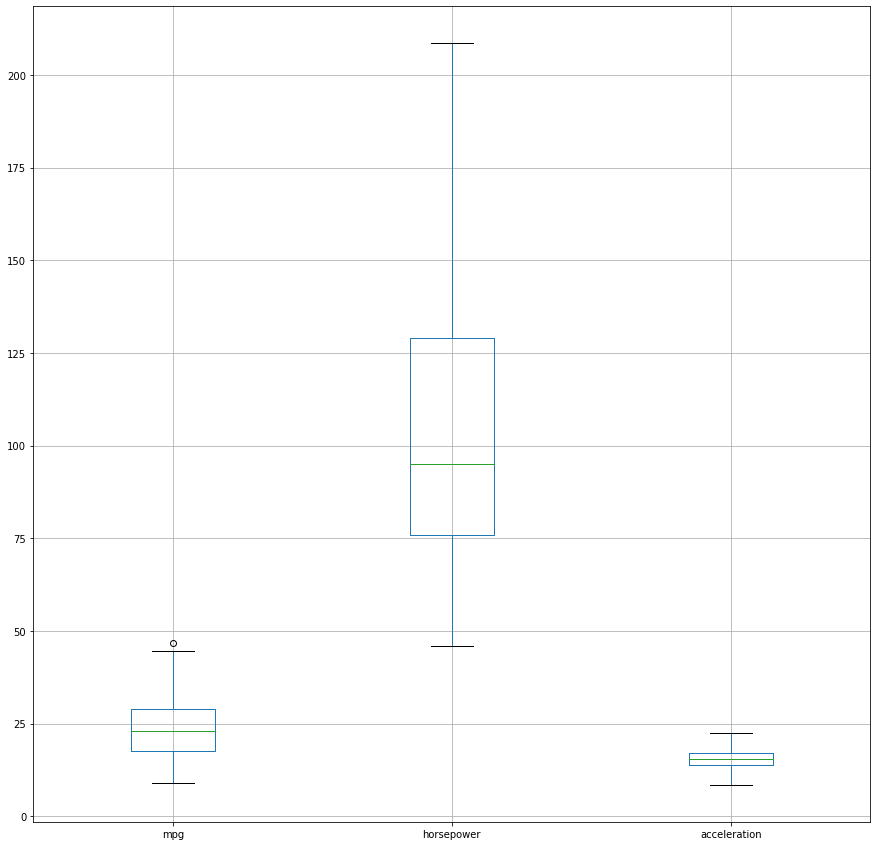

In [57]:
plt.figure(figsize=(15,15))
df.boxplot(column=["mpg","horsepower","acceleration"])

In [58]:
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504       12.0000   
1    15.0          8         350.0       165.0    3693       11.5000   
2    18.0          8         318.0       150.0    3436       11.0000   
3    16.0          8         304.0       150.0    3433       12.0000   
4    17.0          8         302.0       140.0    3449       10.5000   
..    ...        ...           ...         ...     ...           ...   
401  27.0          4         140.0        86.0    2790       15.6000   
402  44.0          4          97.0        52.0    2130       22.3875   
403  32.0          4         135.0        84.0    2295       11.6000   
404  28.0          4         120.0        79.0    2625       18.6000   
405  31.0          4         119.0        82.0    2720       19.4000   

     Model_Year  origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4            70       1  
..          ...     ...  
401          82       1  
402          82       2  
403          82       1  
404          82       1  
405          82       1  

[406 rows x 8 columns]

<AxesSubplot:>

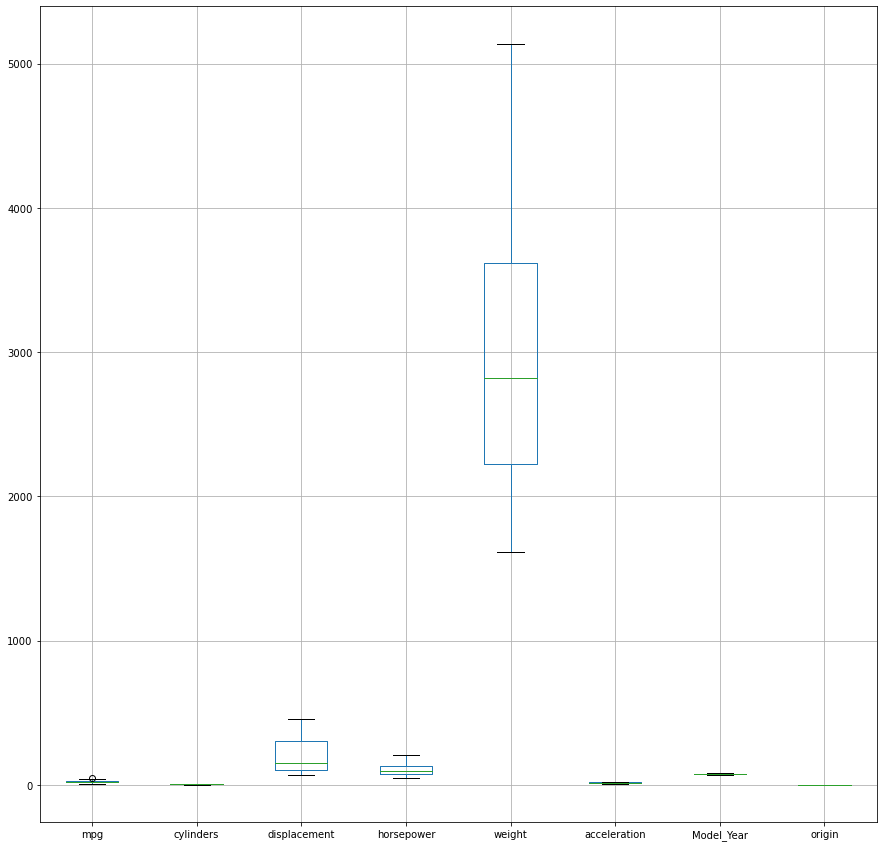

In [59]:
plt.figure(figsize=(15,15))
df.boxplot()

In [60]:
df[df.duplicated()]

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, Model_Year, origin]
Index: []

In [61]:
df.corr()

mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.762698     -0.791268   -0.764455 -0.823327   
cylinders    -0.762698   1.000000      0.951787    0.846724  0.895220   
displacement -0.791268   0.951787      1.000000    0.896949  0.932475   
horsepower   -0.764455   0.846724      0.896949    1.000000  0.869226   
weight       -0.823327   0.895220      0.932475    0.869226  1.000000   
acceleration  0.407809  -0.526254     -0.563128   -0.698216 -0.435046   
Model_Year    0.565698  -0.360762     -0.381714   -0.419670 -0.315389   
origin        0.561059  -0.567478     -0.613056   -0.462750 -0.584109   

              acceleration  Model_Year    origin  
mpg               0.407809    0.565698  0.561059  
cylinders        -0.526254   -0.360762 -0.567478  
displacement     -0.563128   -0.381714 -0.613056  
horsepower       -0.698216   -0.419670 -0.462750  
weight           -0.435046   -0.315389 -0.584109  
acceleration      1.000000    0.301467  0.219217  
Model_Year        0.301467    1.000000  0.187656  
origin            0.219217    0.187656  1.000000

In [62]:
df=df.drop('origin',axis=1)
df

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504       12.0000   
1    15.0          8         350.0       165.0    3693       11.5000   
2    18.0          8         318.0       150.0    3436       11.0000   
3    16.0          8         304.0       150.0    3433       12.0000   
4    17.0          8         302.0       140.0    3449       10.5000   
..    ...        ...           ...         ...     ...           ...   
401  27.0          4         140.0        86.0    2790       15.6000   
402  44.0          4          97.0        52.0    2130       22.3875   
403  32.0          4         135.0        84.0    2295       11.6000   
404  28.0          4         120.0        79.0    2625       18.6000   
405  31.0          4         119.0        82.0    2720       19.4000   

     Model_Year  
0            70  
1            70  
2            70  
3            70  
4            70  
..          ...  
401          82  
402          82  
403          82  
404          82  
405          82  

[406 rows x 7 columns]

In [63]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [64]:
x1=df.drop('mpg',axis=1)
y1=df['mpg']
print(x1)
print(y1)

     cylinders  displacement  horsepower  weight  acceleration  Model_Year
0            8         307.0       130.0    3504       12.0000          70
1            8         350.0       165.0    3693       11.5000          70
2            8         318.0       150.0    3436       11.0000          70
3            8         304.0       150.0    3433       12.0000          70
4            8         302.0       140.0    3449       10.5000          70
..         ...           ...         ...     ...           ...         ...
401          4         140.0        86.0    2790       15.6000          82
402          4          97.0        52.0    2130       22.3875          82
403          4         135.0        84.0    2295       11.6000          82
404          4         120.0        79.0    2625       18.6000          82
405          4         119.0        82.0    2720       19.4000          82

[406 rows x 6 columns]
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
401 

In [65]:
scaled_value = MinMaxScaler()
col_names = ['cylinders','displacement','horsepower','weight','acceleration','Model_Year']
df[col_names] = scaled_value.fit_transform(x1)


In [66]:
df

mpg  cylinders  displacement  horsepower    weight  acceleration  \
0    18.0        1.0      0.617571    0.516923  0.536150      0.252698   
1    15.0        1.0      0.728682    0.732308  0.589736      0.216727   
2    18.0        1.0      0.645995    0.640000  0.516870      0.180755   
3    16.0        1.0      0.609819    0.640000  0.516019      0.252698   
4    17.0        1.0      0.604651    0.578462  0.520556      0.144784   
..    ...        ...           ...         ...       ...           ...   
401  27.0        0.2      0.186047    0.246154  0.333711      0.511691   
402  44.0        0.2      0.074935    0.036923  0.146583      1.000000   
403  32.0        0.2      0.173127    0.233846  0.193365      0.223921   
404  28.0        0.2      0.134367    0.203077  0.286929      0.727518   
405  31.0        0.2      0.131783    0.221538  0.313864      0.785072   

     Model_Year  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
..          ...  
401         1.0  
402         1.0  
403         1.0  
404         1.0  
405         1.0  

[406 rows x 7 columns]

In [67]:
x=df.drop('mpg',axis=1)
y=df['mpg']
print(x)
print(y)

     cylinders  displacement  horsepower    weight  acceleration  Model_Year
0          1.0      0.617571    0.516923  0.536150      0.252698         0.0
1          1.0      0.728682    0.732308  0.589736      0.216727         0.0
2          1.0      0.645995    0.640000  0.516870      0.180755         0.0
3          1.0      0.609819    0.640000  0.516019      0.252698         0.0
4          1.0      0.604651    0.578462  0.520556      0.144784         0.0
..         ...           ...         ...       ...           ...         ...
401        0.2      0.186047    0.246154  0.333711      0.511691         1.0
402        0.2      0.074935    0.036923  0.146583      1.000000         1.0
403        0.2      0.173127    0.233846  0.193365      0.223921         1.0
404        0.2      0.134367    0.203077  0.286929      0.727518         1.0
405        0.2      0.131783    0.221538  0.313864      0.785072         1.0

[406 rows x 6 columns]
0      18.0
1      15.0
2      18.0
3      16.0
4   

<AxesSubplot:>

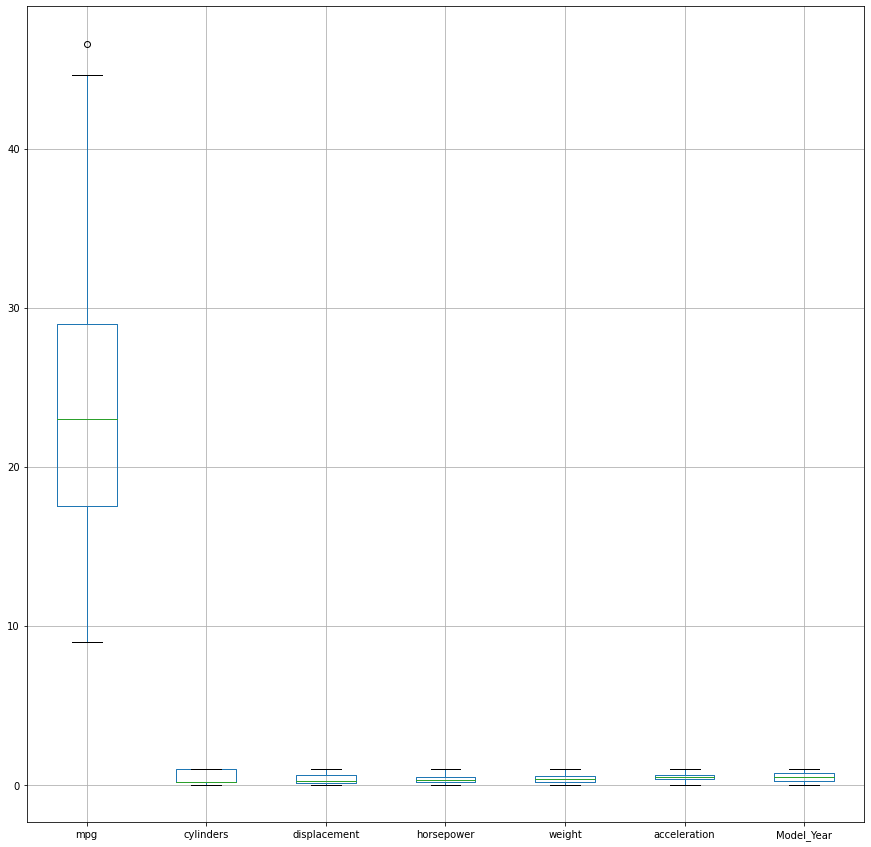

In [68]:
plt.figure(figsize=(15,15))
df.boxplot()

# Spliting data into independent and dependent variable

In [69]:
x

cylinders  displacement  horsepower    weight  acceleration  Model_Year
0          1.0      0.617571    0.516923  0.536150      0.252698         0.0
1          1.0      0.728682    0.732308  0.589736      0.216727         0.0
2          1.0      0.645995    0.640000  0.516870      0.180755         0.0
3          1.0      0.609819    0.640000  0.516019      0.252698         0.0
4          1.0      0.604651    0.578462  0.520556      0.144784         0.0
..         ...           ...         ...       ...           ...         ...
401        0.2      0.186047    0.246154  0.333711      0.511691         1.0
402        0.2      0.074935    0.036923  0.146583      1.000000         1.0
403        0.2      0.173127    0.233846  0.193365      0.223921         1.0
404        0.2      0.134367    0.203077  0.286929      0.727518         1.0
405        0.2      0.131783    0.221538  0.313864      0.785072         1.0

[406 rows x 6 columns]

In [70]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
401    27.0
402    44.0
403    32.0
404    28.0
405    31.0
Name: mpg, Length: 406, dtype: float64

# hold out validation

In [71]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.15,random_state=1)

In [72]:
display(x_train,y_train)

cylinders  displacement  horsepower  weight  acceleration  Model_Year
375          4         112.0        88.0    2605          19.6          82
167          6         231.0       110.0    3907          21.0          75
125          4         116.0        75.0    2158          15.5          73
268          6         258.0       120.0    3410          15.1          78
370          6         146.0       120.0    2930          13.8          81
..         ...           ...         ...     ...           ...         ...
255          4          91.0        60.0    1800          16.4          78
72           8         351.0       153.0    4129          13.0          72
396          4         156.0        92.0    2585          14.5          82
235          6         250.0        98.0    3525          19.0          77
37           4         113.0        95.0    2228          14.0          71

[345 rows x 6 columns]

375    28.0
167    17.0
125    24.0
268    18.1
370    24.2
       ... 
255    36.1
72     14.0
396    26.0
235    18.5
37     25.0
Name: mpg, Length: 345, dtype: float64

# creating instance of model

In [73]:
Lr_model = LinearRegression()
Lr_model

LinearRegression()

# Training model of Training Data

In [74]:
Lr_model.fit(x_train,y_train)

LinearRegression()

# Predicting Output Variable

In [75]:
y_pred = Lr_model.predict(x_test)
y_pred


array([31.99814835, 27.25722436, 26.98183071, 14.14312304, 11.23087027,
       27.67957417, 28.4740182 , 21.92018695, 24.3719599 , 20.97561184,
       34.15338544, 31.33143933, 28.09088454, 13.38537947, 22.65067767,
       14.39174202, 31.81438205, 10.79817727, 27.66046457, 29.79112241,
       16.76041549, 30.67303384, 24.99212014, 21.21364853, 16.99172879,
       17.94565493, 30.32865817, 21.94777697,  8.98026824, 25.68409085,
       32.42418502, 16.28171692, 31.52906441, 25.62132758, 10.79390273,
       26.0516123 , 31.74227209, 28.02191635, 19.19159061, 31.36308595,
       12.03118643, 18.31088959, 30.00731072, 19.41382508, 26.18936322,
       29.26003504, 17.65166267, 21.17571279, 21.07232675, 27.75416934,
       27.69676487, 30.10461559, 24.32794251, 19.75991985, 25.66615953,
       27.29457154, 14.48188686, 30.55882945, 30.77406552, 29.86121609,
       32.78463386])

In [76]:
y_test

362    33.7
62     27.0
321    26.4
92     13.0
146    14.0
       ... 
18     15.0
246    30.0
227    33.5
404    28.0
402    44.0
Name: mpg, Length: 61, dtype: float64

In [77]:
Residuals = y_test-y_pred
Residuals

362     1.701852
62     -0.257224
321    -0.581831
92     -1.143123
146     2.769130
         ...    
18      0.518113
246    -0.558829
227     2.725934
404    -1.861216
402    11.215366
Name: mpg, Length: 61, dtype: float64

# Evaluating the model

In [78]:
mse = mean_squared_error(y_test,y_pred)
mse

16.921171116053063

In [79]:
rmse = np.sqrt(mse)
rmse

4.113535111805059

In [80]:
mae = mean_absolute_error(y_test,y_pred)
mae

2.7287585496858826

In [81]:
r2 = r2_score(y_test,y_pred)
r2

0.758191622474451

In [82]:
Adj_R2 = 1-(((1-r2)*(df.shape[0]-1))/(df.shape[0]-df.shape[1]-1))
Adj_R2

0.7539387113119413

In [83]:
Lr_model.coef_     #slopes of BFL

array([-1.81970667e-01,  1.31311897e-03, -5.58014527e-04, -6.32672980e-03,
       -5.10041267e-02,  6.88039445e-01])

In [84]:
Lr_model.intercept_    #intercept of BFL

-8.387284354366788

In [85]:
p=Lr_model.predict([[6,200.0,85.0,2587,16.0,70]]) 
p

#21   - 6	200.0	85.0	2587	16.0	70

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.71552931])

# For KNN Regression

In [86]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [87]:
display(x1,y1)

cylinders  displacement  horsepower  weight  acceleration  Model_Year
0            8         307.0       130.0    3504       12.0000          70
1            8         350.0       165.0    3693       11.5000          70
2            8         318.0       150.0    3436       11.0000          70
3            8         304.0       150.0    3433       12.0000          70
4            8         302.0       140.0    3449       10.5000          70
..         ...           ...         ...     ...           ...         ...
401          4         140.0        86.0    2790       15.6000          82
402          4          97.0        52.0    2130       22.3875          82
403          4         135.0        84.0    2295       11.6000          82
404          4         120.0        79.0    2625       18.6000          82
405          4         119.0        82.0    2720       19.4000          82

[406 rows x 6 columns]

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
401    27.0
402    44.0
403    32.0
404    28.0
405    31.0
Name: mpg, Length: 406, dtype: float64

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.15,random_state=1)

In [89]:
Knnr_model=KNeighborsRegressor()
Knnr_model

KNeighborsRegressor()

In [90]:
Knnr_model.fit(x_train,y_train)

KNeighborsRegressor()

In [91]:
ypred_knn=Knnr_model.predict(x_test)
print(ypred_knn)


[31.38       33.18       21.8        16.10291457 13.2        26.2
 21.8        19.         24.         19.88       35.64       23.78
 28.84       14.9        19.6        16.00291457 33.76       14.5
 31.52       33.32       14.5        26.44       28.28       20.18
 17.78       16.4        34.44       19.72       12.         36.74
 30.74       17.24       32.7        27.48       14.1        29.3
 33.22       27.8        18.32       30.14       14.4        18.72
 31.84       18.7        31.06       27.88       14.3        19.3
 20.6        27.2        26.2        28.36       23.78       15.74
 29.04       20.6        17.8        34.74       28.8        28.5
 36.32      ]


In [92]:
r2_knnr=r2_score(y_test,ypred_knn)
r2_knnr

0.6505529624149439

In [93]:
p=Knnr_model.predict([[6,200.0,85.0,2587,16.0,70]]) 
p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([24.12])

In [94]:
mean_squared_error(y_test,ypred_knn)

24.453466747031133

In [95]:
hyperparamters = {'n_neighbors': np.arange(5, 25),
                  'p': [1, 2]}

gscv_model = GridSearchCV(Knnr_model, hyperparamters, cv=10)
gscv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24]),
                         'p': [1, 2]})

In [96]:
gscv_model.best_params_

{'n_neighbors': 8, 'p': 1}

In [97]:
knng_model = KNeighborsRegressor(n_neighbors=8, p=1)
knng_model.fit(x_train, y_train)
y_pred_gscv = knng_model.predict(x_test)
r2_score(y_test, y_pred_gscv)

0.673234141012261

In [98]:
hyperparamters = {'n_neighbors': np.arange(5, 25),
                  'p': [1, 2]}
rscv_model = RandomizedSearchCV(Knnr_model, hyperparamters, cv=5)
rscv_model.fit(x_train, y_train)


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24]),
                                        'p': [1, 2]})

In [99]:
rscv_model.best_params_

{'p': 1, 'n_neighbors': 9}

In [100]:
knn_rmodel = KNeighborsRegressor(n_neighbors=7, p=1)
knn_rmodel.fit(x_train, y_train)
y_pred_rscv = knn_rmodel.predict(x_test)
r2_score(y_test, y_pred_rscv)

0.6704268922732002

In [101]:
p=knn_rmodel.predict([[6,200.0,85.0,2587,16.0,70]]) 
p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([23.4])

# Decision Tree Regression Model

In [102]:
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [103]:
DTR_model=DecisionTreeRegressor()
DTR_model

DecisionTreeRegressor()

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.15,random_state=2)

For Teating r2_score

In [105]:
DTR_model.fit(x_train,y_train)
yDt_pred=DTR_model.predict(x_test)
r2_DTR=r2_score(y_test,yDt_pred)
r2_DTR

0.7390593239301776

For Training r2_score

In [106]:
ydt_pred=DTR_model.predict(x_train)
r2_dtr=r2_score(y_train,ydt_pred)
r2_dtr

1.0

In [107]:
p=DTR_model.predict([[6,200.0,85.0,2587,16.0,70]]) 
p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([21.])

# Hyper_parameter Tunning

In [108]:
dt_model=DecisionTreeRegressor(random_state=1)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [109]:
dt_model.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [110]:
hyperparameters = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
                    'max_depth':np.arange(10,20),
                  'min_samples_leaf':np.arange(2,20),
                  'min_samples_split':np.arange(2,20)}
gscv_dt_model=GridSearchCV(dt_model,hyperparameters,cv=5)
gscv_dt_model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [111]:
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [112]:
gscv_dt_model.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [113]:
y_pred=gscv_dt_model.predict(x_test)
r2_score(y_test,y_pred)

0.7942379026581621

In [114]:
p=gscv_dt_model.predict([[6,200.0,85.0,2587,16.0,70]]) 
p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([20.7])

For training r2_score

In [115]:
y_pred_train=gscv_dt_model.predict(x_train)
r2_score(y_train,y_pred_train)

0.8931311794331245

In [116]:
hyperparameters = {'criterion':["squared_error", "friedman_mse", "absolute_error","poisson"],
                    'max_depth':np.arange(4,100),
                  'min_samples_leaf':np.arange(2,20),
                  'min_samples_split':np.arange(2,10)}
rscv_dt_model=RandomizedSearchCV(dt_model,hyperparameters)
rscv_dt_model

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                        

In [117]:
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                        

In [118]:
rscv_dt_model.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 14,
 'max_depth': 95,
 'criterion': 'friedman_mse'}

In [119]:
y_pred1=rscv_dt_model.predict(x_test)
r2_score(y_test,y_pred1)

0.7767589395604898

In [120]:
y_predt=rscv_dt_model.predict(x_train)
r2_score(y_train,y_predt)

0.8662274521986855

In [121]:
new_model=DecisionTreeRegressor(min_samples_split= 9,
 min_samples_leaf= 7,
 max_depth= 34,
 criterion= 'absolute_error')

In [122]:
new_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=34,
                      min_samples_leaf=7, min_samples_split=9)

In [123]:
y_pred_new=new_model.predict(x_test)
r2_score(y_test,y_pred_new)

0.7103485158283862

In [124]:
plt.figure(figsize=(200,200))
tree=plot_tree(decision_tree=new_model,
               feature_names=df.columns,
               filled=True)
print('Decision Tree')
plt.savefig('Decision Tree2.png')

Decision Tree


In [125]:
p=rscv_dt_model.predict([[6,200.0,85.0,2587,16.0,70]]) 
p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([20.42666667])

# For Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor

In [127]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=1)

In [128]:
Rr_model=RandomForestRegressor()
Rr_model

RandomForestRegressor()

In [129]:
Rr_model.fit(x_train,y_train)

RandomForestRegressor()

For testing r2_score

In [130]:
y_predRr=Rr_model.predict(x_test)
Rr_r2=r2_score(y_test,y_predRr)
Rr_r2

0.8255486194635634

In [131]:
p=Rr_model.predict([[6,200.0,85.0,2587,16.0,70]]) 
p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([20.748])

For training r2_score

In [132]:
y_predTR=Rr_model.predict(x_train)
Rrt_r2=r2_score(y_train,y_predTR)
Rrt_r2

0.9816345374063081

In [133]:
Rr_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [134]:
params = {'n_estimators':np.arange(10,20),
         'criterion': ['squared_error',"absolute_error","poisson"],
         'max_depth':np.arange(2,20),
         'min_samples_leaf':np.arange(1,10),
         'min_samples_split':np.arange(2,10),
         'max_features':['auto'],
         'random_state':[10]}

rf_model=RandomForestRegressor()

rf_hyper_model = GridSearchCV(rf_model,param_grid=params,cv=5)

In [135]:
rf_hyper_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                         'max_features': ['auto'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'random_state': [10]})

In [136]:
rf_hyper_model.best_params_

{'criterion': 'absolute_error',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 18,
 'random_state': 10}

In [137]:
y_pred_gscv = rf_hyper_model.predict(x_test)
r2_value_gscv = r2_score(y_test,y_pred_gscv)
r2_value_gscv

0.7962479013938626

In [138]:
y_pred_Tgscv = rf_hyper_model.predict(x_train)
r2_value_Tgscv = r2_score(y_train,y_pred_Tgscv)
r2_value_Tgscv

0.9225463528256378

In [139]:
params = {'n_estimators':np.arange(10,20),
         'criterion': ['squared_error',"absolute_error","poisson"],
         'max_depth':np.arange(2,20),
         'min_samples_leaf':np.arange(1,10),
         'min_samples_split':np.arange(2,10),
         'max_features':['auto'],
         'random_state':[10]}

rf_model=RandomForestRegressor()

rf_hyper_model = RandomizedSearchCV(rf_model,params)

In [140]:
rf_hyper_model.fit(x_train,y_train)
rf_hyper_model.best_params_

{'random_state': 10,
 'n_estimators': 17,
 'min_samples_split': 7,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 19,
 'criterion': 'squared_error'}

In [141]:
y_pred_rscv = rf_hyper_model.predict(x_test)
r2_value_rscv = r2_score(y_test,y_pred_rscv)
r2_value_rscv

0.8032402232993516

In [142]:
y_pred_rscvT = rf_hyper_model.predict(x_train)
r2_value_rscvT = r2_score(y_train,y_pred_rscvT)
r2_value_rscvT

0.9422900171732077

In [143]:
p=rf_hyper_model.predict([[6,200.0,85.0,2587,16.0,70]]) 
p

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([20.44449669])

# Saving The Multiple model in Joblib pickle file.

In [162]:
import joblib
import os

In [163]:
os.getcwd()

'C:\\Users\\YOGESH\\project'

In [164]:
Model_List=[Lr_model,knn_rmodel,gscv_dt_model,rf_hyper_model]

In [165]:
joblib.dump(Model_List,open("Car_mpg_models.pkl",'wb'))

In [166]:
joblib.dump(Lr_model,open("Car_mpg_models1lr.pkl",'wb'))

In [167]:
joblib.dump(knn_rmodel,open("Car_mpg_models2knn.pkl",'wb'))

In [168]:
joblib.dump(gscv_dt_model,open("Car_mpg_models3dt.pkl",'wb'))

In [169]:
joblib.dump(rf_hyper_model,open("Car_mpg_models4rf.pkl",'wb'))

In [170]:
Model_List2=[Lr_model,knn_rmodel,DTR_model,rf_hyper_model]

In [171]:
joblib.dump(Model_List2,open("Car_mpg_models2.pkl",'wb'))

In [172]:
Model_List3=[Lr_model,knn_rmodel,rscv_dt_model,rf_hyper_model]

In [173]:
joblib.dump(Model_List3,open("Car_mpg_models3.pkl",'wb'))

In [174]:
Model_List4=[Lr_model,knn_rmodel,DTR_model,rf_hyper_model]

In [175]:
joblib.dump(Model_List4,open("Car_mpg_models4.pkl",'wb'))

In [176]:
Lr_model_full = LinearRegression()
Lr_model_full
Lr_model_full.fit(x1,y)

LinearRegression()

In [177]:
Model_List_for_LR=[Lr_model_full,knn_rmodel,gscv_dt_model,rf_hyper_model]

In [178]:
joblib.dump(Model_List_for_LR,open("Car_mpg_models1lrfull.pkl",'wb'))